In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import pandas as pd

In [2]:
%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (662, 1000, 3)


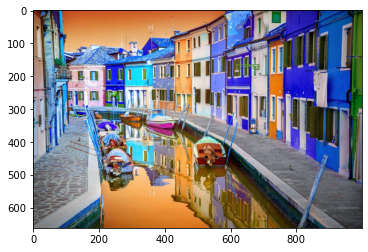

In [3]:
image = cv2.imread('python-project-color-detection/colorpic.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (662, 1000, 3)

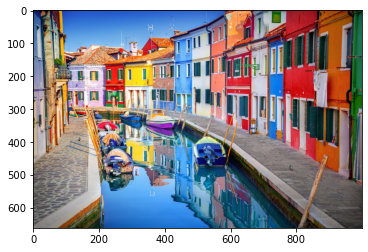

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

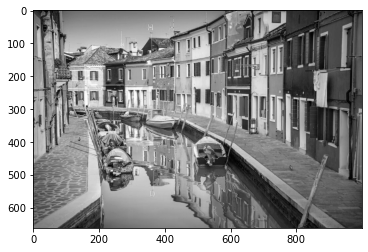

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

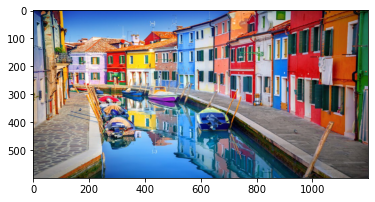

In [6]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [7]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

In [10]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [11]:
number_of_colors = 7
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [12]:
header_list = ["color", "color_name", "hex", "R", "G", "B"]

data = pd.read_csv("python-project-color-detection/colors.csv", names=header_list)


In [13]:
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(data.loc[i, "R"])) + abs(G - int(data.loc[i, "G"])) + abs(B - int(data.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = data.loc[i, "color_name"]
    return cname

In [14]:
show_chart = 1
counts = Counter(labels)
center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
cname = [get_color_name(ordered_colors[i][0],ordered_colors[i][1],ordered_colors[i][2]) for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = cname, colors = hex_colors)


NameError: name 'csv' is not defined

In [ ]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'BROWN' : [165,42,42],
    'PURPLE' : [216,0,216]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images),i+1)
    plt.imshow(images[i])

In [ ]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [ ]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

In [ ]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

In [ ]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

In [ ]:
# Search for BROWN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BROWN'], 60, 5)

In [ ]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

In [ ]:
# Search for PURPLE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['PURPLE'], 20, 5)